KNN lab

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("ggplot")

In [6]:
from sklearn import neighbors

df = pd.read_csv("./iris.csv",header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.replace("Iris-setosa",0,inplace=True)
df.replace("Iris-versicolor",1,inplace=True)
df.replace("Iris-virginica",2,inplace=True)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df.dropna(inplace=True)

In [9]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=.4,random_state=42,stratify=y)

In [12]:
X_train

array([[7.4, 2.8, 6.1, 1.9],
       [4.6, 3.4, 1.4, 0.3],
       [5.6, 2.7, 4.2, 1.3],
       [5.7, 2.9, 4.2, 1.3],
       [5. , 3.4, 1.6, 0.4],
       [5. , 3. , 1.6, 0.2],
       [5.1, 3.8, 1.5, 0.3],
       [4.4, 2.9, 1.4, 0.2],
       [7.2, 3. , 5.8, 1.6],
       [6.7, 3.3, 5.7, 2.1],
       [5.1, 3.8, 1.6, 0.2],
       [6.8, 3. , 5.5, 2.1],
       [5.7, 2.6, 3.5, 1. ],
       [6.8, 3.2, 5.9, 2.3],
       [5.7, 3. , 4.2, 1.2],
       [6.7, 3.1, 4.4, 1.4],
       [5.4, 3.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [6.2, 2.8, 4.8, 1.8],
       [5.7, 4.4, 1.5, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.6, 2.8, 4.9, 2. ],
       [6.4, 3.1, 5.5, 1.8],
       [6.1, 2.8, 4.7, 1.2],
       [4.8, 3. , 1.4, 0.1],
       [7. , 3.2, 4.7, 1.4],
       [4.8, 3. , 1.4, 0.3],
       [6.4, 2.9, 4.3, 1.3],
       [6.9, 3.1, 5.4, 2.1],
       [5.1, 3.5, 1.4, 0.2],
       [5.8, 2.7, 3.9, 1.2],
       [4.9, 3.1, 1.5, 0.1],
       [6.7, 3.1, 4.7, 1.5],
       [4.6, 3.2, 1.4, 0.2],
       [7.7, 2

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [14]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [15]:
train_accuracy= []
test_accuracy = []
for i in range(1,13):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_accuracy.append(knn.score(X_train,y_train))
    test_accuracy.append(knn.score(X_test,y_test))

In [16]:
train_accuracy

[1.0,
 0.9888888888888889,
 0.9666666666666667,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9777777777777777,
 0.9666666666666667]

In [17]:
test_accuracy

[0.95,
 0.9333333333333333,
 0.9666666666666667,
 0.9166666666666666,
 0.9333333333333333,
 0.9333333333333333,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.95,
 0.95]

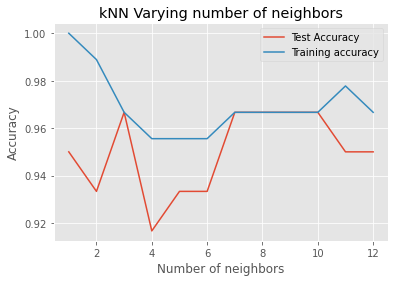

In [18]:
neighbors=[i for i in range(1,13)]
plt.title('kNN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Test Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [19]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [20]:
from IPython.display import Image
import pydotplus

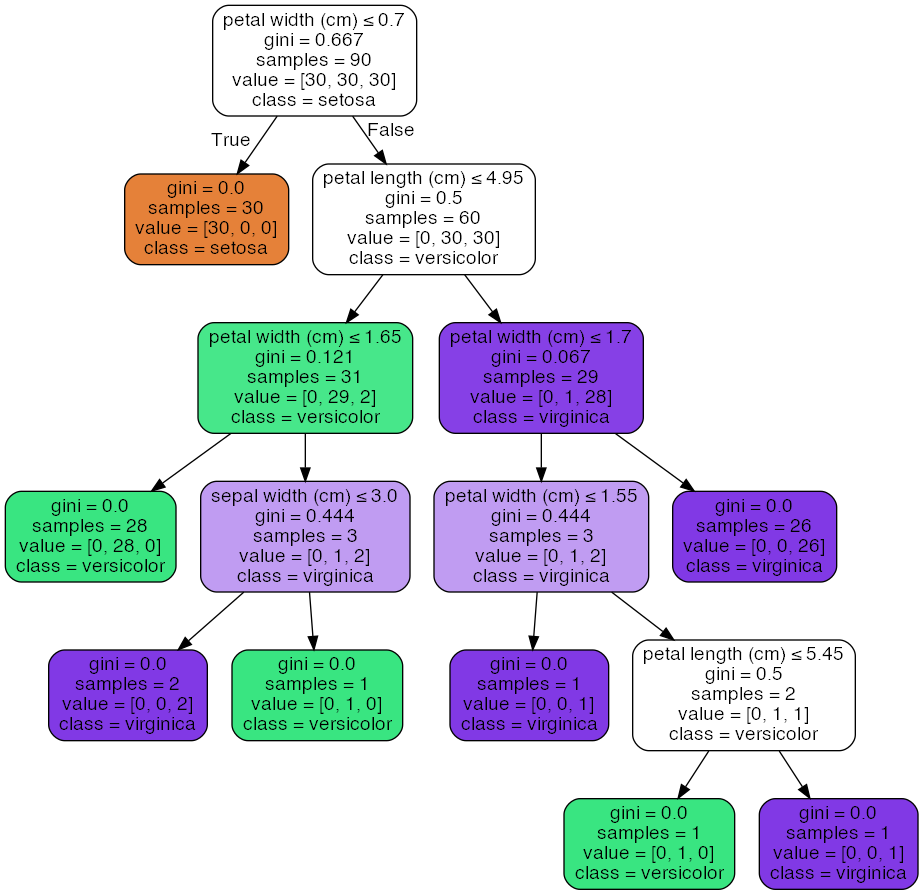

In [22]:
feature_name = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
class_name = ['setosa', 'versicolor', 'virginica']
### use the function export_graphviz() to export the tree to Graphviz format ###
dot_data = tree.export_graphviz(clf,  filled=True, rounded=True,
feature_names=feature_name, class_names=class_name, special_characters=True, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
# graph.write_pdf()
